In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("UPDATED_NLP_COURSE\TextFiles\smsspamcollection.tsv", sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
len(df)

5572

In [6]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [7]:
import pandas as pd

# Sample data
data = pd.Series([1, 2, 2, 3, 3, 3, 4, 4, 4, 4])

# Get value counts
counts = data.value_counts()
print(counts)


4    4
3    3
2    2
1    1
Name: count, dtype: int64


In [8]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

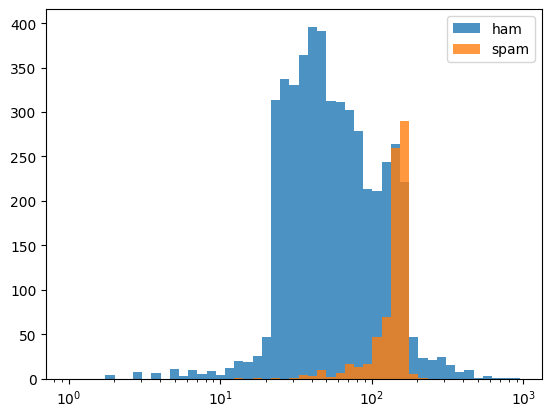

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')#Setting the x scale to the logarthimic scale
bins = 1.15**(np.arange(0,50))#When creating a histogram, bins determines how data is grouped into intervals.
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [10]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


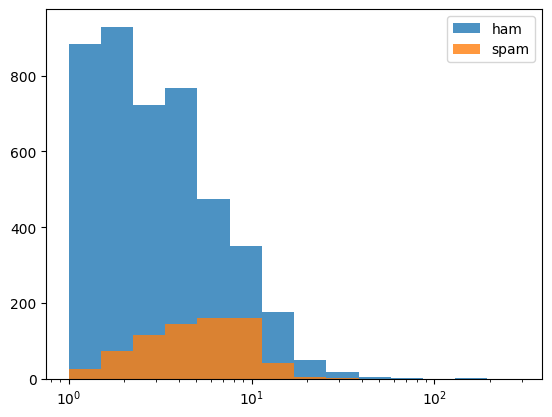

In [11]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [14]:
#X feature data -> lenght,punct
X=df[['length','punct']]#we are passing the list of rows
#y is our label
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
X_train.shape

(3900, 2)

In [16]:
X_test.shape

(1672, 2)

In [17]:
y_test

3245     ham
944      ham
1044     ham
2484     ham
812      ham
        ... 
2505     ham
2525    spam
4975     ham
650     spam
4463     ham
Name: label, Length: 1672, dtype: object

In [18]:
X_test

,length,punct
3245,147,14
944,116,1
1044,102,3
2484,45,0
812,112,4
...,...,...
2505,160,10
2525,99,5
4975,62,5
650,97,11


In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr_model=LogisticRegression(solver='lbfgs')

In [22]:
lr_model.fit(X_train,y_train)

LogisticRegression()

In [23]:
from sklearn import metrics

In [24]:
predictions=lr_model.predict(X_test)

In [25]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [26]:
print(metrics.confusion_matrix(y_test,predictions))

[[1404   44]
 [ 219    5]]


In [27]:
df=pd.DataFrame(metrics.confusion_matrix(y_test,predictions),index=['ham','spam'],columns=['ham','spam'])

In [28]:
df

,ham,spam
ham,1404,44
spam,219,5


In [30]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [31]:
print(metrics.accuracy_score(y_test,predictions))

0.8427033492822966


In [32]:
from sklearn.naive_bayes import MultinomialNB

In [34]:
nb_model=MultinomialNB()
nb_model.fit(X_train,y_train)
predictions=nb_model.predict(X_test)

print(metrics.confusion_matrix(y_test,predictions))

[[1438   10]
 [ 224    0]]


In [35]:
print(metrics.accuracy_score(y_test,predictions))

0.8600478468899522


In [38]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [40]:
df=pd.DataFrame(metrics.confusion_matrix(y_test,predictions),index=['ham','spam'],columns=['ham','spam'])
print(df)

       ham  spam
ham   1438    10
spam   224     0


In [41]:
from sklearn.svm import SVC
scv_model=SVC(gamma='auto')

scv_model.fit(X_train,y_train)
prediction=scv_model.predict(X_test)
print(metrics.confusion_matrix(y_test,prediction))

[[1373   75]
 [ 121  103]]


In [43]:
df=pd.DataFrame(metrics.confusion_matrix(y_test,prediction),index=['ham','spam'],columns=['ham','spam'])
print(df)

       ham  spam
ham   1373    75
spam   121   103
